<a href="https://colab.research.google.com/github/as2c/MLP---Cosmology/blob/main/Optimization/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
%alias_magic t timeit

df = pd.read_csv(r'/content/drive/MyDrive/ML/Project/density_contrast_hunthou.csv')
df.head()

Created `%t` as an alias for `%timeit`.
Created `%%t` as an alias for `%%timeit`.


,particle_id,in-halo,den_contrast for 12.4,den_contrast for 13.0,den_contrast for 13.6
0,6734555,0,-0.053916,-0.046234,-0.039032
1,12718733,1,-0.048032,-0.044974,-0.039007
2,6470459,1,-0.039389,-0.034886,-0.030631
3,12098249,1,-0.049084,-0.045819,-0.039032
4,4799280,1,-0.040202,-0.041805,-0.038101


In [7]:
from sklearn.model_selection import train_test_split 

features = ['den_contrast for 12.4', 'den_contrast for 13.0']
x = df.iloc[:,2:]
y = df['in-halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

Training the model

In [9]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics

clf = DecisionTreeClassifier(max_depth=20)

%t clf.fit(x_train,y_train)

y_pred_dt = clf.predict(x_test)
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

1 loop, best of 5: 227 ms per loop
100 loops, best of 5: 6.17 ms per loop
0.502925


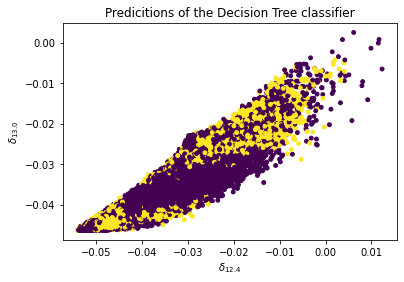

In [12]:
clf = DecisionTreeClassifier(max_depth=20)
clf = clf.fit(x_train,y_train)
plt.scatter(x['den_contrast for 12.4'],x['den_contrast for 13.0'],c=clf.predict(x),s=15)
plt.xlabel('$ \delta_{12.4} $')
plt.ylabel('$\delta_{13.0} $')
plt.title('Predicitions of the Decision Tree classifier')
plt.show()

Validation curve

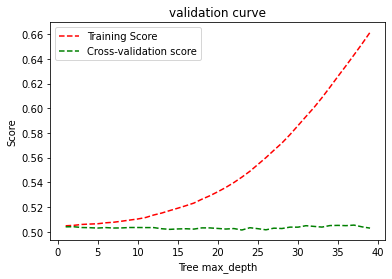

In [13]:
from sklearn.model_selection import validation_curve


param_range = np.arange(1, 40, 1)

train_scores, test_scores = validation_curve(
    clf, X=x, y=y,cv=5, param_name="max_depth", param_range=param_range,
    scoring="accuracy", n_jobs=1)


train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_scores_mean,'r--',label = 'Training Score')
plt.plot(param_range, test_scores_mean,'g--',label = 'Cross-validation score')

plt.title('validation curve')
plt.xlabel('Tree max_depth')
plt.ylabel('Score')
plt.legend(loc='upper left')

plt.show()

Learning curve

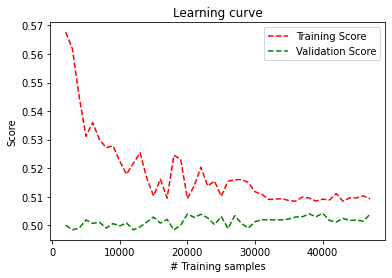

In [14]:
from sklearn.model_selection import learning_curve

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train,y_train)

train_sizes = np.arange(1000,48000,1000)

#computing training score and validation score for each sample size cv times
ns_list, train_scores, validation_scores = learning_curve(
                                                   estimator= clf , X = x,
                                                   y = y, train_sizes = train_sizes, cv = 5, random_state = 0)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

plt.title('Learning curve')
plt.plot(ns_list[1:], train_scores_mean[1:],'r--',label = 'Training Score')
plt.plot(ns_list[1:], validation_scores_mean[1:], 'g--', label = 'Validation Score')
plt.xlabel('# Training samples')
plt.ylabel('Score')
plt.legend(loc='upper right')

plt.show()

Fine Tuning The Model

In [16]:
from sklearn.model_selection import train_test_split 


x = df.iloc[:,2:]
y = df['in-halo']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=20000, random_state=1)

clf = DecisionTreeClassifier(max_depth=6)

%t clf.fit(x_train,y_train)

y_pred_dt = clf.predict(x_test)
%t y_pred_dt = clf.predict(x_test)

print(metrics.accuracy_score(y_test, y_pred_dt))

10 loops, best of 5: 103 ms per loop
100 loops, best of 5: 2.41 ms per loop
0.50265


Confusion Matrix

In [17]:
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, clf.predict(x_test))
print(clf_report)

              precision    recall  f1-score   support

           0       0.50      0.95      0.66     10036
           1       0.51      0.05      0.09      9964

    accuracy                           0.50     20000
   macro avg       0.51      0.50      0.37     20000
weighted avg       0.51      0.50      0.37     20000



In [18]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, clf.predict(x)))

[[48103  2239]
 [47222  2436]]


Confusion matrix, without normalization
[[48103  2239]
 [47222  2436]]
Normalized confusion matrix
[[0.95552421 0.04447579]
 [0.95094446 0.04905554]]


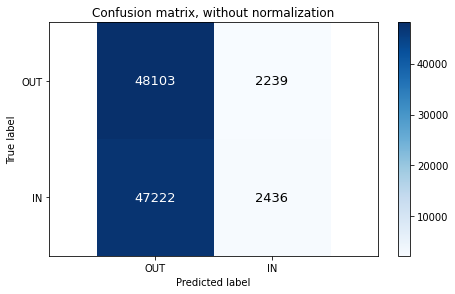

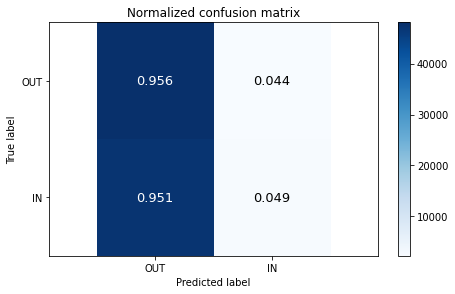

In [19]:
import itertools

conf=confusion_matrix(y, clf.predict(x))
class_names = {'IN' , 'OUT'}

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    #, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j],3),
                 horizontalalignment='center',
                 verticalalignment='center',
                 #transform=ax.transAxes,
                 fontsize = 13,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.axis('equal')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [20]:
from sklearn.metrics import recall_score, precision_score
print(recall_score(y, clf.predict(x), pos_label=0))
print(precision_score(y, clf.predict(x), pos_label = 0))

0.955524214373684
0.5046210333071073


Precision-Recall curve

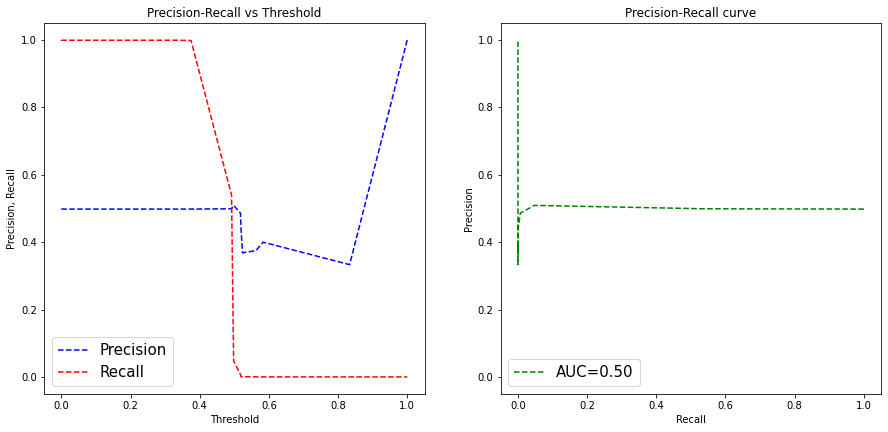

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

y_probs=clf.predict_proba(x_test) 
precision, recall, thresholds = precision_recall_curve(y_test , y_probs[:, 1]) 
thresholds=np.append(0,thresholds)

area = auc(recall, precision)
#print(area)

plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221,xlabel='Threshold',ylabel='Precision, Recall' ,title='Precision-Recall vs Threshold')
ax1.plot(thresholds, precision, "b--", label="Precision")
ax1.plot(thresholds, recall, "r--", label="Recall")
plt.legend(loc="lower left",prop={'size': 15})

ax2 = plt.subplot(222,title='Precision-Recall curve',xlabel='Recall',ylabel='Precision')
ax2.plot( recall,precision,'g--',label='AUC={:.2f}'.format(area))
ax2.set( ylim=(-.05, 1.05))
plt.legend(loc="lower left",prop={'size': 15})

plt.show()